# Analyze of Corona virus in South Korea

### Target
    I want to analyze trend of corona virus contagion.
    From breaking news, we can hear so many people who is involved in church infected and spread.
    So, first of all, i want to prove it's the fact or not 
    
### Dataset
    case_idthe ID of the infection case
    provinceSpecial City / Metropolitan City / Province(-do)
    cityCity(-si) / Country (-gun) / District (-gu)
    group: TRUE: group infection / FALSE: not group
    infection_case: the infection case (the name of group or other cases)
    confirmed: the accumulated number of the confirmed
    latitude: the latitude of the group (WGS84)
    longitude: the longitude of the group (WGS84)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# graph style(격자)
plt.style.use('ggplot')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})

# set fonts on windows
# plt.rc('font', family='Malgun Gothic')
# mac
plt.rc('font', family='AppleGothic')

In [2]:
df = pd.read_csv('./data/Case.csv')

In [3]:
df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [4]:
df.shape

(81, 8)

In [5]:
df.describe()

,case_id,confirmed
count,8.100000e+01,81.000000
mean,3.033337e+06,99.938272
std,2.026944e+06,501.931777
min,1.000001e+06,1.000000
25%,1.300002e+06,3.000000
50%,2.000002e+06,8.000000
75%,5.100001e+06,22.000000
max,7.000001e+06,4359.000000


In [6]:
df['confirmed'].sum()

8095

### The number of COVID19 confirmed in each province
    first of all, we can get how many people are confirmed on each province in korea.
    so I set new data prame by province, confirmed columns. 
    and then it is sorted ascending of confirmed.

In [7]:
# check number of confirmed of province
province_confirmed = pd.DataFrame(df.groupby(['province'])['confirmed'].sum())\
                                .reset_index().sort_values('confirmed', ascending=False)
province_confirmed

,province,confirmed
3,Daegu,6066
8,Gyeongsangbuk-do,1145
15,Seoul,218
7,Gyeonggi-do,164
2,Chungcheongnam-do,115
0,Busan,91
9,Gyeongsangnam-do,85
14,Sejong,40
1,Chungcheongbuk-do,31
10,Incheon,30


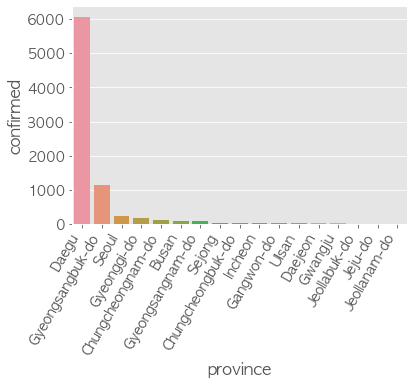

In [8]:
fig= plt.subplot

plt.xticks(rotation=60, ha='right')
sns.barplot(data=province_confirmed, x='province', y='confirmed')

we can recognized almost people in korea is confirmed in Daegu.

### The trend where they were confirmed
    check they were confirmed in group or not

In [9]:
# check number of confirmed of province
print(pd.DataFrame(df.groupby(['group'])['confirmed'].sum()))

       confirmed
group           
False       2280
True        5815


spread in group is twice as much as not in group

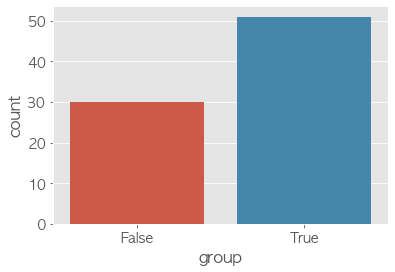

In [10]:
fig= plt.subplot

# seggestion of categories
sns.countplot(data=df, x='group')

In [11]:
df['infection_case'].value_counts()

etc                                      17
Shincheonji Church                       15
contact with patient                      8
overseas inflow                           5
Guro-gu Call Center                       3
Cheongdo Daenam Hospital                  3
gym facility in Cheonan                   2
Seosan-si Laboratory                      2
Onchun Church                             2
Bundang Jesaeng Hospital                  1
Haeundae-gu Catholic Church               1
Suyeong-gu Kindergarten                   1
Gyeongsan Seorin Nursing Home             1
Hanmaeum Changwon Hospital                1
Changnyeong Coin Karaoke                  1
Milal Shelter                             1
Seongdong-gu APT                          1
Jongno Community Center                   1
gym facility in Sejong                    1
Gyeongsan Jeil Silver Town                1
Gyeongsan Cham Joeun Community Center     1
Geochang Church                           1
River of Grace Community Church 

church : 1
hospital : 2
call center : 3
comunity center : 4
nursing home : 5
silver town : 6
etc : 9

In [12]:
facilities = {1:'Church', 2 : 'Hospital', 3:'Call Center', 4:'Community Center', 4: 'gym', 5:'Nursing Home', 5:'Silver Town', 6:'Academy', 7: 'APT', 8:'overseas', 9:'etc'}

In [13]:
import re
train = df
count=0
for case in train['infection_case']:
    for i in facilities:
        if facilities[i] in case:
            train.loc[count, 'facilities_num'] = i
            train.loc[count, 'facilities'] = facilities[i]
            break
        else:
            train.loc[count, 'facilities_num'] = 9
            train.loc[count, 'facilities'] = facilities[i]
    count = count + 1

In [14]:
train.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude,facilities_num,facilities
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387,3.0,Call Center
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766,1.0,Church
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165,2.0,Hospital
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403,7.0,APT
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006,9.0,etc


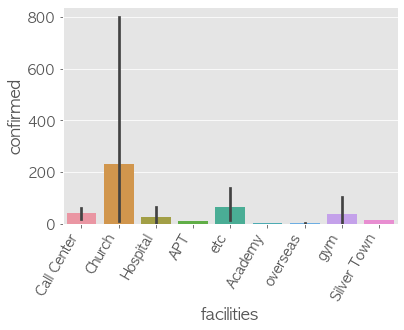

In [15]:
fig= plt.subplot

plt.xticks(rotation=60, ha='right')
sns.barplot(data=train, x='facilities', y='confirmed')

In [16]:
# check number of confirmed of facilities
facilities_confirmed = pd.DataFrame(train.groupby(['facilities'])['confirmed'].sum())\
                                .reset_index().sort_values('confirmed', ascending=False)
facilities_confirmed

,facilities,confirmed
3,Church,5117
6,etc,2527
4,Hospital,165
2,Call Center,129
7,gym,113
5,Silver Town,17
0,APT,13
8,overseas,10
1,Academy,4


In [17]:
# Feature Normalizing
facilities_confirmed['percent'] = facilities_confirmed['confirmed']/facilities_confirmed['confirmed'].sum()
facilities_confirmed

,facilities,confirmed,percent
3,Church,5117,0.632119
6,etc,2527,0.312168
4,Hospital,165,0.020383
2,Call Center,129,0.015936
7,gym,113,0.013959
5,Silver Town,17,0.002100
0,APT,13,0.001606
8,overseas,10,0.001235
1,Academy,4,0.000494


### Conclusion
    63% people infect corona virus in church.
    But Hospital is just about 2%.
    it means almost Hospital or facilities is doing anti-virus action well.
    As well as infector from overseas are only 0.1% of total
    
    Unlike normal facilities, many infections have occurred in religious facilities.
    
    
    Conclusionly, Korean government is judged to be appropriate procedures to restrict religious facilities.
    and then, there are only a few cases of overseas inflow, 
    so of course we need to be cautious, but we believe that procedures such as the entry restrict will not be necessary.
    In this case, from overseas is under the control by goverment.
    
    
    
